## Import Libraries

In [4]:
# Ensure this command is executed in an IPython environment (like a Jupyter notebook cell)
%load_ext autoreload
%autoreload 2

In [5]:
# Import necessary libraries
import pandas as pd
import os
import sys
import numpy as np

import os
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import hiplot as hip
import matplotlib.pyplot as plt


raw_path = '../data/raw/'
processed_path = '../data/processed/'
sys.path.append(raw_path)

In [40]:
# Function to read a Feather file
def read_feather_file(file_path):
    try:
        # Read the feather file
        df = pd.read_feather(file_path)
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# File paths 
telemetry_large_consumers_file = raw_path + 'telemetry_large_consumers_DCW.feather'
standard_profiles_file = raw_path +'standard_profiles_DCW.feather'
customer_attributes_file = raw_path +'customer_attributes_DCW.feather'

# Read the files
telemetry_large_consumers_df = read_feather_file(telemetry_large_consumers_file)
standard_profiles_df = read_feather_file(standard_profiles_file)
customer_attributes_df = read_feather_file(customer_attributes_file)

An error occurred: malloc of size 4794032640 failed


In [41]:
df_melted = pd.read_csv(processed_path + "df_melted_filtered.csv")

In [43]:
# Initial Exploration
# To understand the basic structure of the datasets, let's print the first few rows of each dataframe
print("Telemetry Large Consumers:")
telemetry_large_consumers_df

Telemetry Large Consumers:


In [ ]:
import pandas as pd

# **Assuming you have your 'telemetry_large_consumers_df' loaded as a pandas DataFrame**

# Select the first 100 rows
df_first_100 = telemetry_large_consumers_df.head(100)

# Save as a new feather file
df_first_100.to_feather('telemetry_first_100.feather')

In [ ]:
print("\nStandard Profiles:")
standard_profiles_df.head()

In [ ]:
print("\nCustomer Attributes:")
customer_attributes_df.head()

In [ ]:
standard_profiles_df['PROFIEL'].unique()

In [ ]:
from googletrans import Translator
standard_profiles_df = read_feather_file(standard_profiles_file)

# Instantiate the translator
translator = Translator()

# Function to translate column names
def translate_column_names(dataframe):
    translations = {col: translator.translate(col, src='nl', dest='en').text for col in dataframe.columns}
    dataframe.rename(columns=translations, inplace=True)
    return dataframe


# Now translate the column names from Dutch to English
standard_profiles_df = translate_column_names(standard_profiles_df)
customer_attributes_df = translate_column_names(customer_attributes_df)


In [ ]:
# Print the translated dataframe columns
print(standard_profiles_df.head())

In [ ]:
df = standard_profiles_df

In [ ]:
# Convert 'Date of time' column to datetime format
df['Date of time'] = pd.to_datetime(df['Date of time'])

# Round the datetime to the nearest day
df['Date of time'] = df['Date of time'].dt.to_period('Y').dt.to_timestamp()

# Group by 'PROFILE' and sum the 'VALUE' column
grouped_df = df.groupby(['PROFILE', 'Date of time']).sum().reset_index()

print(grouped_df)

#### KVK segments are the segments from the chamber of commerce

In [ ]:
# Print the translated dataframe columns
print(customer_attributes_df.head())

In [ ]:
customer_attributes_df['Baseload_profile'].unique()

In [ ]:
customer_attributes_df.info()

In [ ]:
customer_attributes_df.rename({'Rnd_id': 'RND_ID'}, axis=1, inplace=True)
df_first_100.rename({'Rnd_id': 'RND_ID'}, axis=1, inplace=True)

In [ ]:
df_first_100['RND_ID'] = df_first_100['RND_ID'].astype(str)
customer_attributes_df['RND_ID'] = customer_attributes_df['RND_ID'].astype(str)

In [ ]:
print("Telemetry DataFrame ID column type:", df_first_100['RND_ID'].dtype)
print("Customer Attributes DataFrame ID column type:", customer_attributes_df['RND_ID'].dtype)

In [ ]:
# Merging the dataframes on the ID columns
merged_data = pd.merge(df_first_100, customer_attributes_df, left_on='RND_ID', right_on='RND_ID', how='inner')

In [ ]:
merged_data.head()

In [ ]:
# Melting the DataFrame
df_melted = merged_data.melt(id_vars=['RND_ID', 'Baseload_profile', 'Connection category'], 
                    var_name='Datetime', 
                    value_name='Consumption')

# Convert 'Datetime' to datetime type
df_melted['Datetime'] = pd.to_datetime(df_melted['Datetime'])

# Sorting by 'RND_ID' and 'Datetime'
df_melted = df_melted.sort_values(by=['RND_ID', 'Datetime']).reset_index(drop=True)

df_melted

In [ ]:
# df_melted.to_csv(processed_path+"df_merged_filtered.csv")

In [6]:
df_melted = pd.read_csv(processed_path + "df_melted_filtered.csv")

In [7]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695360 entries, 0 to 4695359
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   RND_ID               int64  
 2   Baseload_profile     object 
 3   Connection category  object 
 4   Datetime             object 
 5   Consumption          float64
dtypes: float64(1), int64(2), object(3)
memory usage: 214.9+ MB


In [8]:
df_melted = df_melted.replace('?', np.nan)
df_melted['Consumption'] = df_melted['Consumption'].astype(np.float64).fillna(method='bfill')

C:\Users\20235149\AppData\Local\Temp\ipykernel_24044\2942179247.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_melted['Consumption'] = df_melted['Consumption'].astype(np.float64).fillna(method='bfill')


In [9]:
# Convert 'Datetime' to datetime type
df_melted['Datetime'] = pd.to_datetime(df_melted['Datetime'])
df_melted

,Unnamed: 0,RND_ID,Baseload_profile,Connection category,Datetime,Consumption
0,0,10038,013,AC4B,2023-01-01 00:00:00,8.00
1,1,10038,013,AC4B,2023-01-01 00:15:00,8.00
2,2,10038,013,AC4B,2023-01-01 00:30:00,8.00
3,3,10038,013,AC4B,2023-01-01 00:45:00,8.00
4,4,10038,013,AC4B,2023-01-01 01:00:00,8.00
...,...,...,...,...,...,...
4695355,4695355,9974,008,AC4B,2023-12-31 22:45:00,2.47
4695356,4695356,9974,008,AC4B,2023-12-31 23:00:00,0.32
4695357,4695357,9974,008,AC4B,2023-12-31 23:15:00,2.20
4695358,4695358,9974,008,AC4B,2023-12-31 23:30:00,1.00


In [10]:
# Display the data types and first few rows
print(df_melted.dtypes)
print(df_melted.head())

Unnamed: 0                      int64
RND_ID                          int64
Baseload_profile               object
Connection category            object
Datetime               datetime64[ns]
Consumption                   float64
dtype: object
   Unnamed: 0  RND_ID Baseload_profile Connection category  \
0           0   10038              013                AC4B   
1           1   10038              013                AC4B   
2           2   10038              013                AC4B   
3           3   10038              013                AC4B   
4           4   10038              013                AC4B   

             Datetime  Consumption  
0 2023-01-01 00:00:00          8.0  
1 2023-01-01 00:15:00          8.0  
2 2023-01-01 00:30:00          8.0  
3 2023-01-01 00:45:00          8.0  
4 2023-01-01 01:00:00          8.0  


In [ ]:
# # Resample to hourly intervals, summing up the consumption values
# df_melted_hourly = df_melted.groupby(['RND_ID', 'Baseload_profile', 'Connection category']).resample('H').sum()

# # For simplication,
# # I will resample so that each row
# # represents a whole hour
# df_uci_hourly = df_uci.resample('H').sum()
# df_uci_hourly['hour'] = df_uci_hourly.index.hour
# df_uci_hourly.index = df_uci_hourly.index.date

# df_uci_pivot = df_uci_hourly.pivot(columns='hour')
# df_uci_pivot = df_uci_pivot.dropna()

# df_uci_pivot.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.02)

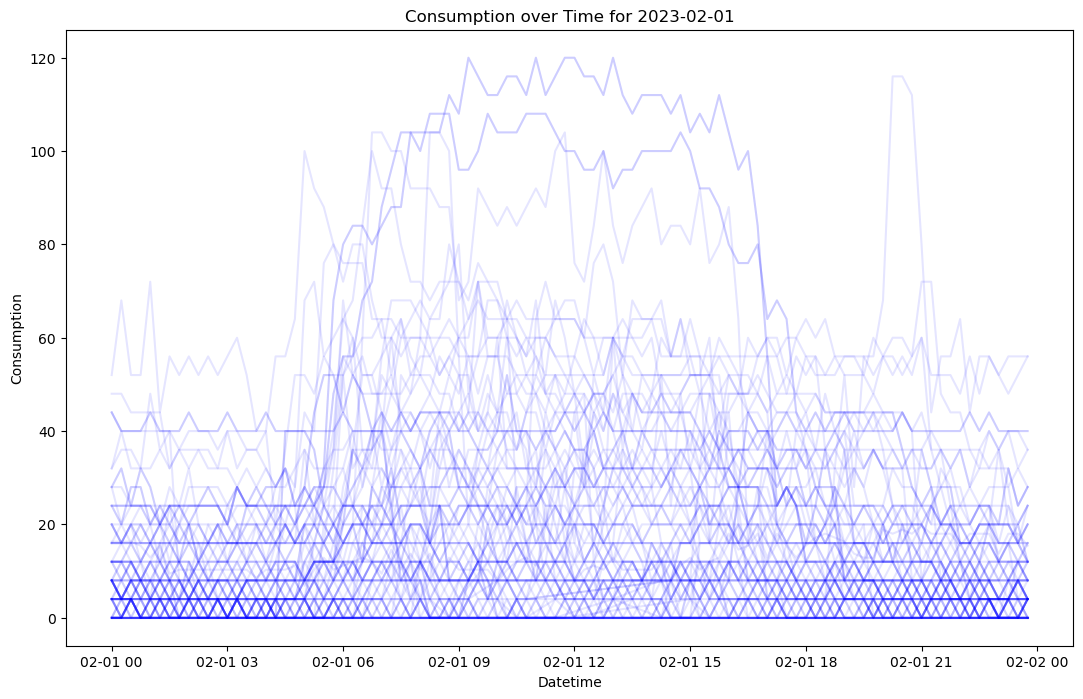

In [56]:
df_filtered = df_melted[df_melted['Consumption'] >= 0]

# Filter for a specific day (e.g., '2023-01-01')
specific_day = '2023-02-01'
df_filtered = df_filtered[df_filtered['Datetime'].dt.date == pd.to_datetime(specific_day).date()]

# Set 'Datetime' as the index for plotting
df_filtered.set_index('Datetime', inplace=True)

# Plotting the data
plt.figure(figsize=(13, 8))
for key, grp in df_filtered.groupby(['RND_ID', 'Baseload_profile', 'Connection category']):
    plt.plot(grp.index, grp['Consumption'], alpha=0.1, color='blue')

# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Consumption')
plt.title(f'Consumption over Time for {specific_day}')

# Show the plot
plt.show()

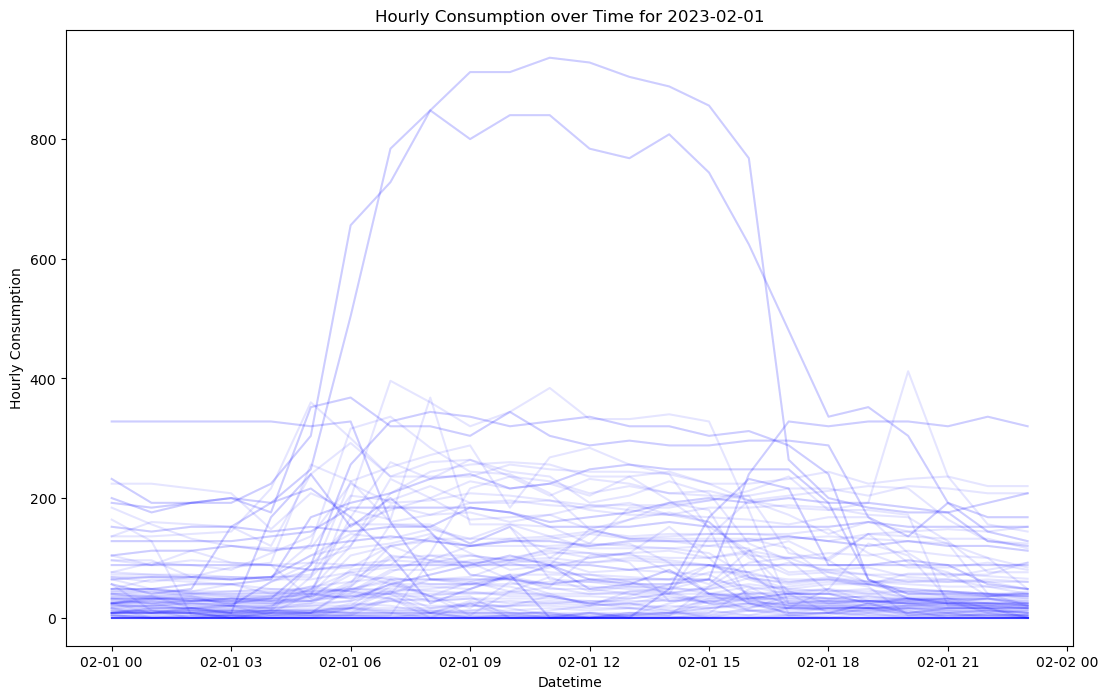

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is already created and filtered for the specific day

# Resample to hourly intervals, summing up the consumption values
df_hourly = df_filtered.resample('H').sum()

# Plotting the hourly data
plt.figure(figsize=(13, 8))
for key, grp in df_filtered.groupby(['RND_ID', 'Baseload_profile', 'Connection category']):
    hourly_grp = grp.resample('H').sum()
    plt.plot(hourly_grp.index, hourly_grp['Consumption'], alpha=0.1, color='blue')

# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Hourly Consumption')
plt.title(f'Hourly Consumption over Time for {specific_day}')

# Show the plot
plt.show()


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Datetime' to datetime type
df_melted['Datetime'] = pd.to_datetime(df_melted['Datetime'])
df_melted

,Unnamed: 0,RND_ID,Baseload_profile,Connection category,Datetime,Consumption
0,0,10038,013,AC4B,2023-01-01 00:00:00,8.00
1,1,10038,013,AC4B,2023-01-01 00:15:00,8.00
2,2,10038,013,AC4B,2023-01-01 00:30:00,8.00
3,3,10038,013,AC4B,2023-01-01 00:45:00,8.00
4,4,10038,013,AC4B,2023-01-01 01:00:00,8.00
...,...,...,...,...,...,...
4695355,4695355,9974,008,AC4B,2023-12-31 22:45:00,2.47
4695356,4695356,9974,008,AC4B,2023-12-31 23:00:00,0.32
4695357,4695357,9974,008,AC4B,2023-12-31 23:15:00,2.20
4695358,4695358,9974,008,AC4B,2023-12-31 23:30:00,1.00


C:\Users\20235149\AppData\Local\Temp\ipykernel_7220\2323236765.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = df_filtered.index.hour


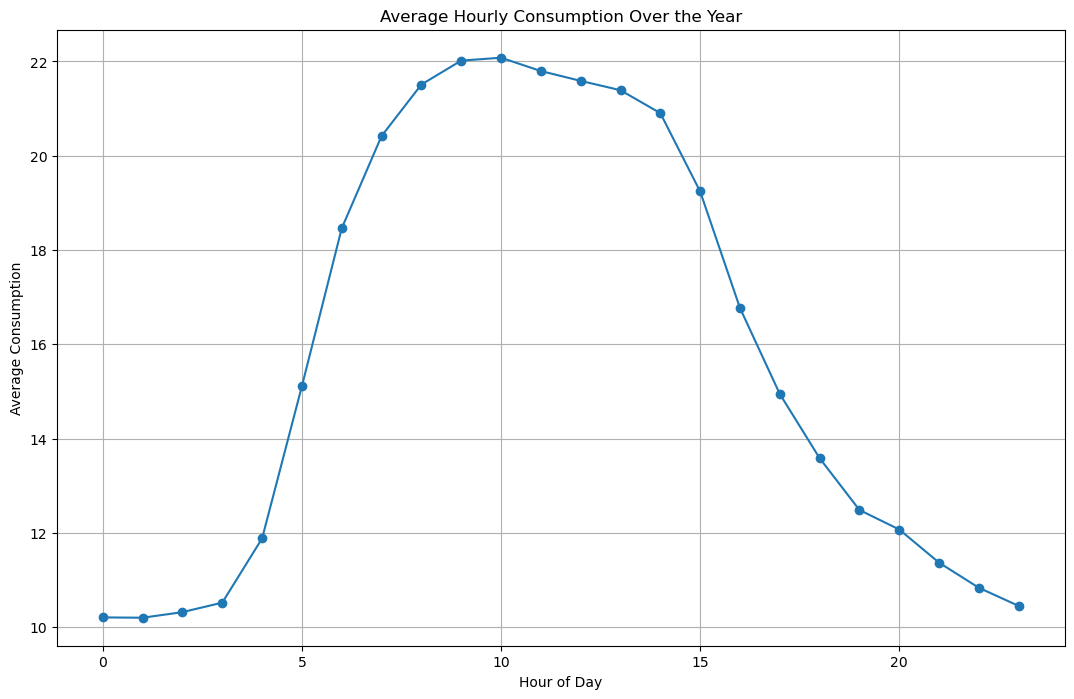

In [59]:
# Set 'Datetime' as the index
df_filtered = df_melted[df_melted['Consumption'] >= 0]

# Ensure 'Datetime' is the index
df_filtered.set_index('Datetime', inplace=True)

# Extract the hour of the day from the datetime index
df_filtered['Hour'] = df_filtered.index.hour

# Group by the hour of the day and calculate the average consumption
df_hourly_avg = df_filtered.groupby('Hour')['Consumption'].mean()

# Plotting the average hourly consumption
plt.figure(figsize=(13, 8))
plt.plot(df_hourly_avg.index, df_hourly_avg.values, marker='o', linestyle='-')
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption')
plt.title('Average Hourly Consumption Over the Year')

# Show the plot
plt.grid(True)
plt.show()

C:\Users\20235149\AppData\Local\Temp\ipykernel_7220\3947109046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = df_filtered.index.hour


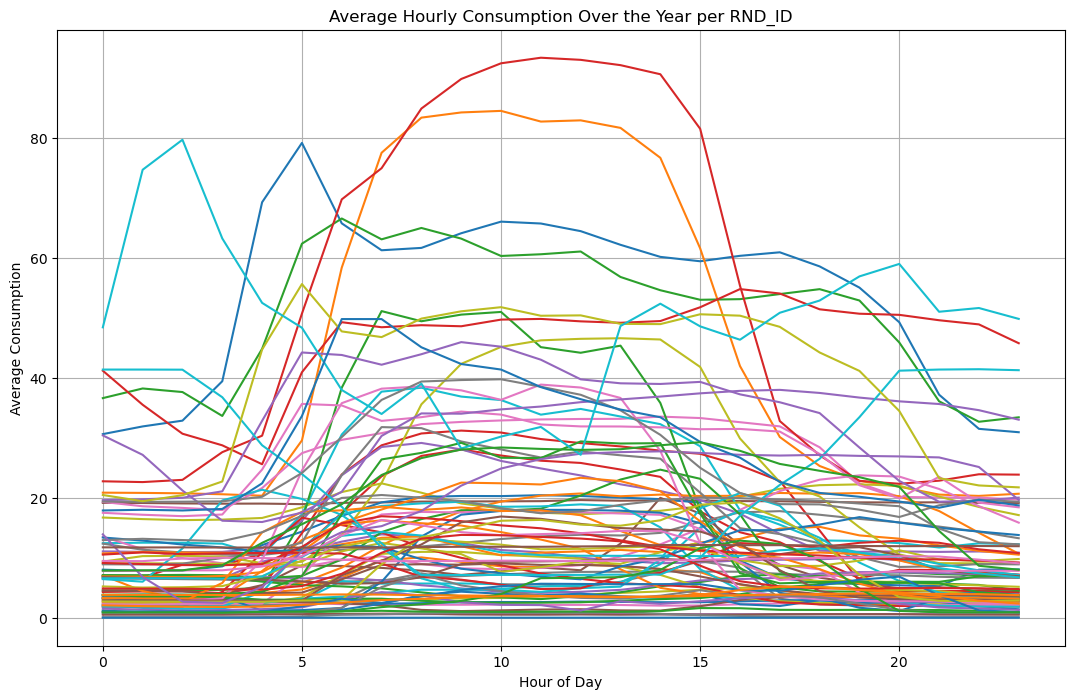

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Datetime' is the index
df_filtered = df_melted[df_melted['Consumption'] >= 0]
df_filtered.set_index('Datetime', inplace=True)

# Extract the hour of the day from the datetime index
df_filtered['Hour'] = df_filtered.index.hour

# Group by 'RND_ID' and 'Hour' and calculate the average consumption
df_hourly_avg_per_rnd_id = df_filtered.groupby(['RND_ID', 'Hour'])['Consumption'].mean().reset_index()

# Plotting the average hourly consumption per RND_ID
plt.figure(figsize=(13, 8))
for rnd_id in df_hourly_avg_per_rnd_id['RND_ID'].unique():
    hourly_data = df_hourly_avg_per_rnd_id[df_hourly_avg_per_rnd_id['RND_ID'] == rnd_id]
    plt.plot(hourly_data['Hour'], hourly_data['Consumption'], linestyle='-', label=f'RND_ID {rnd_id}')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption')
plt.title('Average Hourly Consumption Over the Year per RND_ID')
# plt.legend(title='RND_ID')

# Show the plot
plt.grid(True)
plt.show()


C:\Users\20235149\AppData\Local\Temp\ipykernel_7220\53463425.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = df_filtered.index.hour
C:\Users\20235149\AppData\Local\Temp\ipykernel_7220\53463425.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', df_hourly_avg_per_rnd_id['Baseload_profile'].nunique())


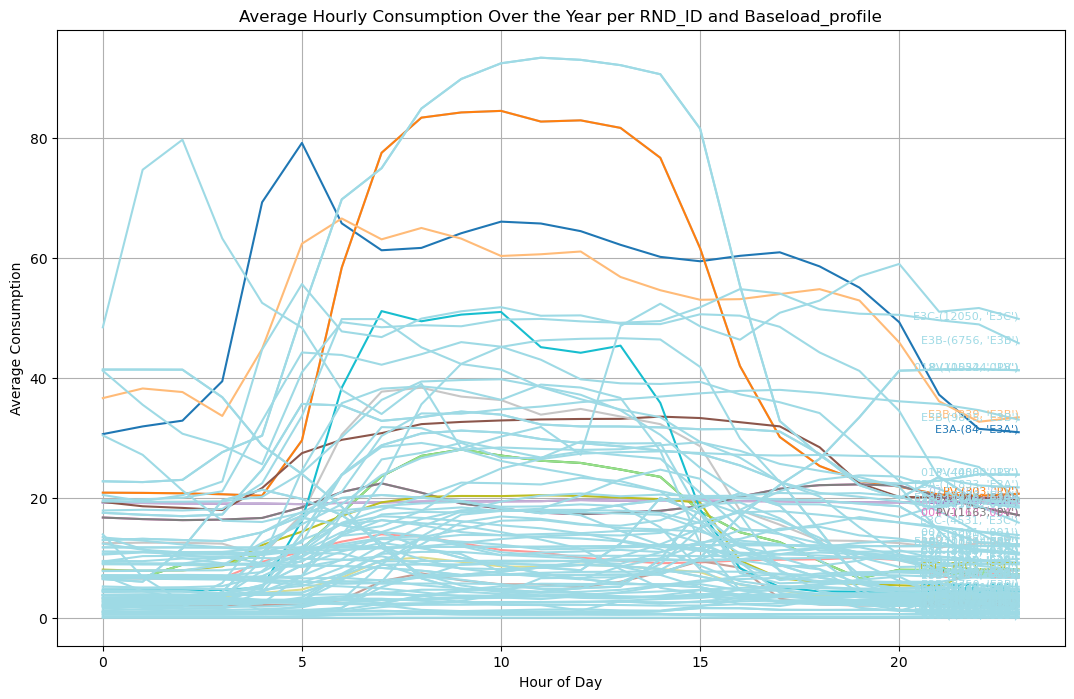

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Datetime' is the index
df_filtered = df_melted[df_melted['Consumption'] >= 0]
df_filtered.set_index('Datetime', inplace=True)

# Extract the hour of the day from the datetime index
df_filtered['Hour'] = df_filtered.index.hour

# Group by 'RND_ID', 'Baseload_profile' and 'Hour' and calculate the average consumption
df_hourly_avg_per_rnd_id = df_filtered.groupby(['RND_ID', 'Baseload_profile', 'Hour'])['Consumption'].mean().reset_index()

# Plotting the average hourly consumption per RND_ID and Baseload_profile
plt.figure(figsize=(13, 8))
colors = plt.cm.get_cmap('tab20', df_hourly_avg_per_rnd_id['Baseload_profile'].nunique())

for i, (rnd_id, profile) in enumerate(df_hourly_avg_per_rnd_id.groupby(['RND_ID', 'Baseload_profile'])):
    hourly_data = profile
    plt.plot(hourly_data['Hour'], hourly_data['Consumption'], color=colors(i), linestyle='-')
    # Add label to the end of each line
    plt.text(hourly_data['Hour'].iloc[-1], hourly_data['Consumption'].iloc[-1], f'{hourly_data["Baseload_profile"].iloc[0]}-{rnd_id}', 
             color=colors(i), fontsize=8, ha='right')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption')
plt.title('Average Hourly Consumption Over the Year per RND_ID and Baseload_profile')

# Show the plot
plt.grid(True)
plt.show()


In [62]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
from bokeh.models import HoverTool

hv.extension('bokeh')

# Ensure 'Datetime' is the index
df_filtered = df_melted[df_melted['Consumption'] >= 0]
df_filtered.set_index('Datetime', inplace=True)

# Extract the hour of the day from the datetime index
df_filtered['Hour'] = df_filtered.index.hour

# Group by 'RND_ID', 'Baseload_profile' and 'Hour' and calculate the average consumption
df_hourly_avg_per_rnd_id = df_filtered.groupby(['RND_ID', 'Baseload_profile', 'Hour'])['Consumption'].mean().reset_index()

# Create the plot using hvPlot
plot = df_hourly_avg_per_rnd_id.hvplot.line(
    x='Hour', 
    y='Consumption', 
    by='RND_ID', 
    groupby='Baseload_profile', 
    line_width=2, 
    width=1200, 
    height=600,
    hover_cols=['RND_ID', 'Baseload_profile']
).opts(legend_position='right')

# Add hover tool
hover = HoverTool(tooltips=[
    ('RND_ID', '@RND_ID'),
    ('Baseload_profile', '@Baseload_profile'),
    ('Hour', '@Hour'),
    ('Consumption', '@Consumption')
])

plot.opts(tools=[hover])

# Show the plot
plot

C:\Users\20235149\AppData\Local\Temp\ipykernel_7220\4045661950.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = df_filtered.index.hour


:DynamicMap   [Baseload_profile]
   :NdOverlay   [RND_ID]
      :Curve   [Hour]   (Consumption,RND_ID,Baseload_profile)